In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import statsmodels.api as sm
import scipy
import seaborn as sns

# IMPORT MY LATEX SO I CAN USE \TEXTSC
import matplotlib as mpl
mpl.rc('text', **{'usetex':True})
import re
plt.rc( 'font', family = 'serif')

In [2]:
charm_intrasocket_latency_f = '../data/2021_08_14_17_08_06_osu_latency_charm_pe0_64.csv'
charm_intersocket_latency_f = '../data/2021_08_14_17_08_06_osu_latency_charm_pe0_64.csv'
intra_socket = pd.read_csv(charm_intrasocket_latency_f, skiprows=1)
intra_groupsize = pd.read_csv('../data/2021_08_16_07_45_39_osu_latency_charm_pe_0_4_groupsize20.csv', skiprows=1)
inter_socket = pd.read_csv(charm_intersocket_latency_f, skiprows=1)

In [29]:
# Data transformations
# To begin, the first 50 iterations in the Charm benchmark are 
# warmup, they should be skipped.
remove_warmup = lambda x: x.loc[x['Iteration Group'] >= 50]
intra_group = remove_warmup(intra_groupsize)
intra_socket = remove_warmup(intra_socket)
intra_socket = remove_warmup(inter_socket)
is_time = intra_socket.loc[intra_socket['Message Size']==1]['Elapsed seconds']*1e6
print(is_time)
# sm.qqplot((is_time,), fit=True, line="45")
ci = scipy.stats.bootstrap((is_time,), statistic=np.mean,confidence_level=0.99)
print(ci)
ci_width = ci.confidence_interval.high-ci.confidence_interval.low
print((ci_width-is_time.mean())/is_time.mean())

5      2.0559
6      1.8895
7      1.8014
8      1.8054
9      1.8335
        ...  
100    1.8264
101    1.8795
102    1.8073
103    1.8004
104    1.8185
Name: Elapsed seconds, Length: 100, dtype: float64
BootstrapResult(confidence_interval=ConfidenceInterval(low=1.829160458477964, high=1.8665271560745342), standard_error=0.0071315881194992095)
-0.979744621119077


In [26]:
9.146475623729379e-7*1e6

0.9146475623729379

2.0742513568197824e-18


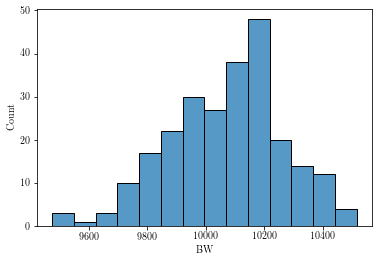

In [50]:
# Does enabling/disabling output writing affect bandwidth at 1mib?
import scipy.stats
enabled = pd.read_csv('../microbenchmarks/run_1mib_enabled')
disabled = pd.read_csv('../microbenchmarks/run_1mib_disabled')

vals = list()
# data = {'enabled': enabled['BW'], 'disabled': disabled['BW']}
# ci = scipy.stats.bootstrap((enabled,), statistic=np.mean,confidence_level=0.99)
# sm.qqplot(enabled['BW'], fit=True, line="45")
# sm.qqplot(disabled['BW'], fit=True, line="45")
sns.histplot(enabled.loc[enabled['BW'] > 8000]['BW'])
# print(ci)
# ci = scipy.stats.bootstrap((disabled,), statistic=np.mean,confidence_level=0.99)
# print(ci)
# stat, p = scipy.stats.mannwhitneyu(enabled['BW'],disabled['BW'])
print(p)
# if p < 0.05:
#     print("They are different")
# data = pd.DataFrame(data)
# print(data)|
# import seaborn as sns
# sns.violinplot(enabled)
# sns.violinplot(data['disabled'])

<AxesSubplot:xlabel='BW', ylabel='Count'>

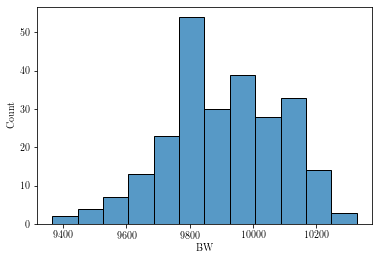

In [48]:
sns.histplot(disabled['BW'])

In [2]:
charm_intra_latency_f = '../data/microbenchmarks/2021_08_18_08_19_15_charm_lat_intrasocket.csv'
charm_inter_latency_f = '../data/microbenchmarks/2021_08_18_08_19_36_charm_lat_intersocket.csv'
mpi_intra_latency_f = '../data/microbenchmarks/2021_08_18_08_20_05_mpi_lat_intrasocket.csv'
mpi_inter_latency_f = '../data/microbenchmarks/2021_08_18_08_20_27_mpi_lat_intersocket.csv'

charm_interhost_bw_f = "../data/microbenchmarks/2021_08_18_08_51_19_charm_bw_internode.csv"
mpi_interhost_bw_f = "../data/microbenchmarks/2021_08_18_08_54_46_mpi_bw_internode.csv"
charm_intra_bw_f = ""
mpi_intra_bw_f = ""
charm_inter_bw_f = ""
mpi_intra_bw_f = ""

charm_intra_lat = pd.read_csv(charm_intra_latency_f, skiprows=1)
charm_inter_lat = pd.read_csv(charm_inter_latency_f, skiprows=1)

mpi_intra_lat = pd.read_csv(mpi_intra_latency_f, skiprows=1)
mpi_inter_lat = pd.read_csv(mpi_inter_latency_f, skiprows=1)

charm_interhost_bw = pd.read_csv(charm_interhost_bw_f, skiprows=1)
mpi_interhost_bw = pd.read_csv(mpi_interhost_bw_f, skiprows=1)

In [340]:


message_sizes = map(float, [1<<x for x in range(0, 23)])
for message_size in message_sizes:
    charm_intra = charm_intra_lat.loc[charm_intra_lat['Message size'] == message_size][3::]['Latency (us)']
    mpi_intra = mpi_intra_lat.loc[mpi_intra_lat['Message size'] == message_size][3::]['Latency (us)']
    ci_charm = scipy.stats.bootstrap((charm_intra,), statistic=np.mean,confidence_level=0.99)
    ci_mpi = scipy.stats.bootstrap((mpi_intra,), statistic=np.mean,confidence_level=0.99)
    ci_charm = (ci_charm.confidence_interval.low,ci_charm.confidence_interval.high)
    ci_mpi = (ci_mpi.confidence_interval.low,ci_mpi.confidence_interval.high)
    charm_percdiff = (((ci_charm[1]-ci_charm[0])-np.mean(charm_intra)))/np.mean(charm_intra)
    print(f"message size: {message_size} charm_mean: {np.mean(charm_intra)}, ci: {ci_charm}, diff: {charm_percdiff}")
    print(f"message size: {message_size} mpi_mean: {np.mean(mpi_intra)}, ci: {ci_mpi}")

message size: 1.0 charm_mean: 8.942912, ci: (8.902207810186326, 8.998667232015446), diff: -0.9892138688349924
message size: 1.0 mpi_mean: 1.138953, ci: (1.0241506645408887, 1.1659464456539803)
message size: 2.0 charm_mean: 8.849341500000001, ci: (8.813088158375376, 8.890852464890347), diff: -0.9912124188545587
message size: 2.0 mpi_mean: 1.1391535, ci: (1.0231326052402188, 1.165453236696771)
message size: 4.0 charm_mean: 8.834763500000001, ci: (8.801199316980822, 8.875244881808458), diff: -0.9916188401842748
message size: 4.0 mpi_mean: 1.1372945, ci: (1.0094444801774047, 1.1645424999999998)
message size: 8.0 charm_mean: 8.801767499999999, ci: (8.770153372418694, 8.841622312271646), diff: -0.9918801604503923
message size: 8.0 mpi_mean: 1.1417045000000001, ci: (1.0155131389812742, 1.1669465482948018)
message size: 16.0 charm_mean: 8.812100000000001, ci: (8.780560842083476, 8.851450308418213), diff: -0.9919554400954668
message size: 16.0 mpi_mean: 1.17202, ci: (1.035459962223659, 1.199773

[ 171.85445013  346.31661807  628.25178557 1112.68793505 1707.75798836
 2332.5951133  2192.51156445 2676.28203394 2943.44497277 3198.42171432
 3408.35009386 3445.80588371 3502.83715931]
[ 124.62157616  243.09432054  474.69040449  879.90195351 1564.17580161
 2825.8672572  4805.68640679 7264.14903843 1898.19526898 2319.12209453
 2601.51551776 2760.92496698 3796.29875593]


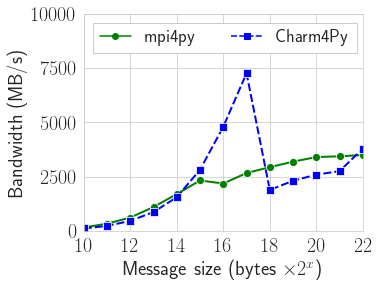

In [5]:
sns.set_style("whitegrid")
charm_data = charm_interhost_bw
mpi_data = mpi_interhost_bw
charm_data['framework'] = 'Charm4Py'
mpi_data['framework'] = 'mpi4py'
df = pd.concat([mpi_data, charm_data]).reset_index(drop=True)
df = df.loc[df['Message size'] >= 1<<10]
df['Message size'] = np.log2(df['Message size'])
df = df.loc[df['Iteration'] >= df['Warmup']]
f, ax = plt.subplots(figsize=(5,4))
pl=sns.lineplot(x="Message size", y="Bandwidth (MB/s)", data=df,hue="framework", 
              palette = ['green', 'blue'],ci=99,err_style="bars",
              markers=['o','s'],style="framework",linewidth=2, markersize=8)
lines = pl.lines[0]
print(lines.get_ydata())
print(pl.lines[2].get_ydata())
mpi4py_bw = pl.lines[0].get_ydata()
charm4py_bw = pl.lines[2].get_ydata()
pl.legend(fontsize = 18, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 2)
pl.tick_params( which = 'major', labelsize = 20 )
pl.set_xlim(10, 22)
pl.set_xticks(range(10,23,2))
pl.set_ylim(0,10000)
pl.set_yticks([0,2500,5000,7500,10000])
pl.set_ylabel('Bandwidth (MB/s)', fontsize=20)
pl.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('internode_bandwidth.pdf', bbox_inches='tight', dpi=300)

      Message size  Grouping  Total Iterations  Warmup  Latency (us) framework
0              1.0       0.0            1000.0    60.0     13.214700  Charm4Py
1              1.0      20.0            1000.0    60.0     10.786125  Charm4Py
2              1.0      40.0            1000.0    60.0     10.218525  Charm4Py
3              1.0      60.0            1000.0    60.0      9.019025  Charm4Py
4              1.0      80.0            1000.0    60.0      9.084650  Charm4Py
...            ...       ...               ...     ...           ...       ...
1797        1024.0     960.0            1000.0    60.0      1.682175    mpi4py
1798        1024.0     980.0            1000.0    60.0      1.679175    mpi4py
1799        1024.0    1000.0            1000.0    60.0      1.676900    mpi4py
1800        1024.0    1020.0            1000.0    60.0      1.682925    mpi4py
1801        1024.0    1040.0            1000.0    60.0      1.680450    mpi4py

[1166 rows x 6 columns]
      Message size  Groupin

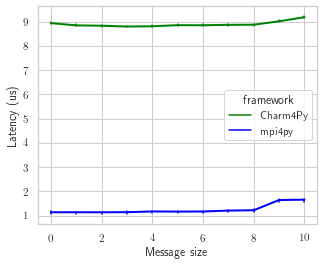

In [345]:
sns.set_style("whitegrid")
charm_data = charm_intra_lat
mpi_data = mpi_intra_lat
charm_data['framework'] = 'Charm4Py'
mpi_data['framework'] = 'mpi4py'
df = pd.concat([charm_data, mpi_data]).reset_index(drop=True)
df = df.loc[df['Message size'] < 1<<11]
print(df)
df['Message size'] = np.log2(df['Message size'])
df = df.loc[df['Grouping'] >= df['Warmup']]
print(df)
f, ax = plt.subplots(figsize=(5,4))
pl=sns.lineplot(x="Message size", y="Latency (us)", data=df,hue="framework", 
              palette = ['green','blue'],ax=ax,ci=99,err_style="bars",
              linewidth=2, markersize=8)
# pl=sns.boxplot(x="Message size", y="Latency (us)", data=df,hue="framework", 
#               palette = ['green', 'blue'])
# pl.set_yscale("log", base=2)
# onemib=df[df['Message size'] == 20]
# twomib=df[df['Message size'] == 21]
# onemib=onemib[onemib['Latency (us)'] > 8]
# twomib=twomib[twomib['Latency (us)'] > 8]
# print(min(onemib['Latency (us)']))
# onemib["size"] = "1mib"
# twomib["size"] = "2mib"
# df2=pd.concat([onemib,twomib])

# sns.boxplot(x="size", y="Latency (us)", data=df2)
# pl.legend(fontsize = 18, loc = 'upper left', fancybox = False, framealpha = 1,
#               handlelength = 1.7, ncol = 2)
# pl.tick_params( which = 'major', labelsize = 20 )
# pl.set_xlim(10, 22)
# pl.set_xticks(range(10,23,2))
# pl.set_ylim(0,10000)
# pl.set_yticks([0,2500,5000,7500,10000])
# pl.set_ylabel('Bandwidth (MB/s)', fontsize=20)
# pl.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)

Text(0.5, 0, 'Message size (bytes $\\times 2^x$)')

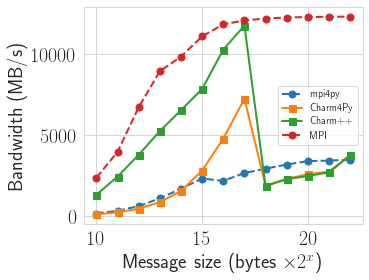

In [9]:
charmp_bw = [
1341.232,
2454.385,
3803.511,
5268.040,
6556.166,
7868.170,
10302.540,
11780.915,
1867.124,
2295.692,
2489.094,
2713.238,
3762.907
]

ompi_bw = [
2389.81,
3991.94,
6745.00,
8963.74,
9869.60,
11115.77,
11860.86,
12102.33,
12219.23,
12282.15,
12313.46,
12329.27,
12336.90
]
x_axis = range(10,23)
(len(ompi_bw), len(charmp_bw), len(charm4py_bw), len(mpi4py_bw))

fix, ax = plt.subplots(figsize=(5,4))
ax.plot(x_axis, mpi4py_bw, label="mpi4py",markersize = 7, linewidth = 2, ls='--', marker = 'o')
ax.plot(x_axis, charm4py_bw, label="Charm4Py",markersize = 7, linewidth = 2, ls='-', marker = 's')
ax.plot(x_axis, charmp_bw, label="Charm++",markersize = 7, linewidth = 2, ls='-', marker = 's')
ax.plot(x_axis, ompi_bw, label="MPI",markersize = 7, linewidth = 2, ls='--', marker = 'o')
ax.legend()

# mpi4py_bw = pl.lines[0].get_ydata()
# charm4py_bw = pl.lines[2].get_ydata()
# pl.legend(fontsize = 18, loc = 'upper left', fancybox = False, framealpha = 1,
#               handlelength = 1.7, ncol = 2)
ax.tick_params( which = 'major', labelsize = 20 )
# pl.set_xlim(10, 22)
# pl.set_xticks(range(10,23,2))
# pl.set_ylim(0,10000)
# pl.set_yticks([0,2500,5000,7500,10000])
ax.set_ylabel('Bandwidth (MB/s)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
# plt.savefig('internode_bandwidth_allmodels.pdf', bbox_inches='tight', dpi=300)

In [37]:
# Calculate times for Charm, Charm4Py

a=charmp_bw[7]
# MB sent
size_a = (64 * (1<<17))/1e6

b = charmp_bw[8]
size_b = (64 * (1<<18))/1e6
a_time = (size_a/a)*1000
b_time = (size_b/b)*1000

print(a,b)
print(a/b)
print(a_time)
print(b_time)
print(a_time/b_time)
print(b_time-a_time)

11780.915 1867.124
6.309658597929222
0.7120506344371383
8.985592815474494
0.07924359016256377
8.273542181037355


In [129]:
basedir = '../data/microbenchmarks/2021-08-23_cleaned'
read_file = lambda x: pd.read_csv(f"{basedir}/{x}", comment='#')[['Msg Size', ' Bandwidth (MB/s)']]
rf = read_file

chpy = [rf('charm4py_intrasocket_bw.csv'), rf('charm4py_intersocket_bw.csv')]
ch = [rf('charm_intrasocket_bw.csv'), rf('charm_intersocket_bw.csv')]
mppy = [rf('mpi4py_intrasocket_bw.csv'), rf('mpi4py_intersocket_bw.csv')]
mp = [rf('mpi_intrasocket_bw.csv'), rf('mpi_intersocket_bw.csv')]


dfs = [*chpy, *ch, *mppy, *mp]
assert len(set([len(x) for x in dfs])) == 1

In [130]:
# Build one dataframe for inter and intra containing data for every framework
chpy[0]['framework'] = 'Charm4Py'
ch[0]['framework'] = 'Charm++'
mppy[0]['framework'] = 'mpi4py'
mp[0]['framework'] = 'MPI'

chpy[1]['framework'] = 'Charm4Py'
ch[1]['framework'] = 'Charm++'
mppy[1]['framework'] = 'mpi4py'
mp[1]['framework'] = 'MPI'
print(chpy[0]['Msg Size'])
intra_bw = pd.concat([chpy[0], ch[0], mppy[0], mp[0]]).reset_index(drop=True)
intra_bw = intra_bw[intra_bw['Msg Size'] >= 1<<4]
intra_bw['Msg Size'] = np.log2(intra_bw['Msg Size'])

inter_bw = pd.concat([chpy[1], ch[1], mppy[1], mp[1]]).reset_index(drop=True)
inter_bw = inter_bw[inter_bw['Msg Size'] >= 1<<4]
inter_bw['Msg Size'] = np.log2(inter_bw['Msg Size'])
print(inter_bw)

0            1
1            2
2            4
3            8
4           16
        ...   
225     262144
226     524288
227    1048576
228    2097152
229    4194304
Name: Msg Size, Length: 230, dtype: int64
     Msg Size   Bandwidth (MB/s) framework
4         4.0           1.207839  Charm4Py
5         5.0           2.420290  Charm4Py
6         6.0           4.816019  Charm4Py
7         7.0           9.580456  Charm4Py
8         8.0          19.176389  Charm4Py
..        ...                ...       ...
915      18.0       19401.160000       MPI
916      19.0       16810.790000       MPI
917      20.0       12168.930000       MPI
918      21.0        9651.630000       MPI
919      22.0        9358.200000       MPI

[760 rows x 3 columns]


/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


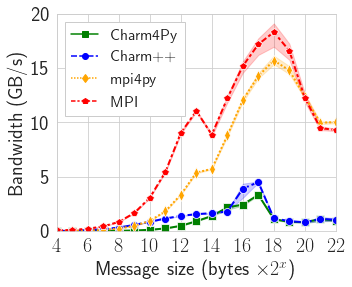

In [134]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" Bandwidth (MB/s)", data=intra_bw,hue="framework", style="framework",
              palette = ['green','blue', 'orange', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=2, markersize=8)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_ylim(0, 20000)
ax.set_yticklabels([0,5,10,15,20])
ax.set_ylabel('Bandwidth (GB/s)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_bw_intrasocket.pdf', bbox_inches='tight', dpi=300)

/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


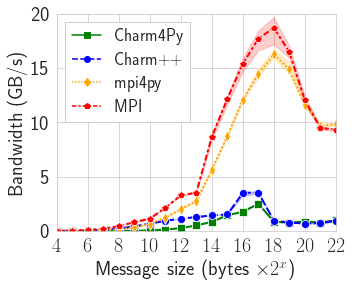

In [133]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" Bandwidth (MB/s)", data=inter_bw,hue="framework", style="framework",
              palette = ['green','blue', 'orange', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=2, markersize=8)
ax.legend(fontsize = 17, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_ylim(0, 20000)
ax.set_yticklabels([0,5,10,15,20])
ax.set_ylabel('Bandwidth (GB/s)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_bw_intersocket.pdf', bbox_inches='tight', dpi=300)


/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


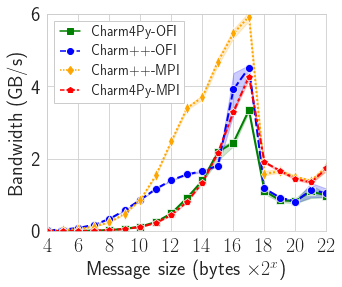

In [149]:



sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" Bandwidth (MB/s)", data=intra_bw,hue="framework", style="framework",
              palette = ['green','blue', 'orange', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=2, markersize=8)
ax.legend(fontsize = 14, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.4, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_ylim(0, 6000)
ax.set_yticklabels([0,2,4,6])
ax.set_ylabel('Bandwidth (GB/s)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('charms_bw_intrasocket_mpi_ofi.pdf', bbox_inches='tight', dpi=300)


In [113]:
# Data with MPI backend
basedir = '../data/microbenchmarks/2021-08-28_bandwidth_cleaned'
read_file = lambda x: pd.read_csv(f"{basedir}/{x}", comment='#')[['Msg Size', ' Bandwidth (MB/s)']]
rf = read_file

chpy_mpi = [rf('charm4py_intrasocket_bw.csv'), rf('charm4py_intersocket_bw.csv'),
           rf('charm4py_internode_bw.csv')]
ch_mpi = [rf('charm_intrasocket_bw.csv'), rf('charm_intersocket_bw.csv'),
         rf('charm_internode_bw.csv')]

mppy = [rf('mpi4py_intrasocket_bw.csv'), rf('mpi4py_intersocket_bw.csv'),
       rf('mpi4py_internode_bw.csv')]
mp = [rf('mpi_intrasocket_bw.csv'), rf('mpi_intersocket_bw.csv'),
     rf('mpi_internode_bw.csv')]


dfs = [*chpy_mpi, *ch_mpi, *mppy, *mp]

assert len(set([len(x) for x in dfs])) == 1

# Build one dataframe for inter and intra containing data for every framework
chpy_mpi[0]['framework'] = 'Charm4Py'
ch_mpi[0]['framework'] = 'Charm++'
mppy[0]['framework'] = 'mpi4py'
mp[0]['framework'] = 'MPI'

chpy_mpi[1]['framework'] = 'Charm4Py'
ch_mpi[1]['framework'] = 'Charm++'
mppy[1]['framework'] = 'mpi4py'
mp[1]['framework'] = 'MPI'

chpy_mpi[2]['framework'] = 'Charm4Py'
ch_mpi[2]['framework'] = 'Charm++'
mppy[2]['framework'] = 'mpi4py'
mp[2]['framework'] = 'MPI'

intra_bw = pd.concat([chpy_mpi[0], ch_mpi[0], mppy[0], mp[0]]).reset_index(drop=True)
intra_bw = intra_bw[intra_bw['Msg Size'] >= 1<<4]
intra_bw['Msg Size'] = np.log2(intra_bw['Msg Size'])

inter_bw = pd.concat([chpy_mpi[1], ch_mpi[1], mppy[1], mp[1]]).reset_index(drop=True)
inter_bw = inter_bw[inter_bw['Msg Size'] >= 1<<4]
inter_bw['Msg Size'] = np.log2(inter_bw['Msg Size'])


internode_bw = pd.concat([chpy_mpi[2], ch_mpi[2], mppy[2], mp[2]]).reset_index(drop=True)
internode_bw = internode_bw[internode_bw['Msg Size'] >= 1<<4]
internode_bw['Msg Size'] = np.log2(internode_bw['Msg Size'])

/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


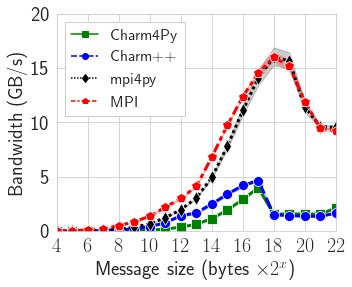

In [114]:
# Plot bandwidth with the MPI backend, intra-socket
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" Bandwidth (MB/s)", data=intra_bw,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_ylim(0, 20000)
ax.set_yticklabels([0,5,10,15,20])
ax.set_ylabel('Bandwidth (GB/s)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_bw_intrasocket_chmpi.pdf', bbox_inches='tight', dpi=300)

/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


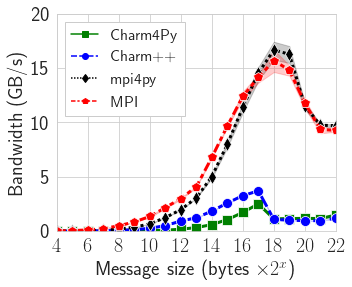

In [115]:
# Plot bandwidth with the MPI backend, inter-socket
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" Bandwidth (MB/s)", data=inter_bw,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_ylim(0, 20000)
ax.set_yticklabels([0,5,10,15,20])
ax.set_ylabel('Bandwidth (GB/s)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_bw_intersocket_chmpi.pdf', bbox_inches='tight', dpi=300)

/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


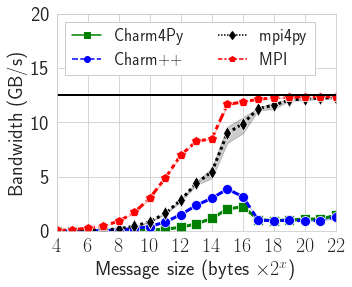

In [116]:
# Plot bandwidth with the MPI backend, inter-node
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" Bandwidth (MB/s)", data=internode_bw,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 17, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 2)
plt.axhline(y=1000*100/8, color='black', linestyle='-', linewidth=2)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_ylim(0, 20000)
ax.set_yticklabels([0,5,10,15,20])
ax.set_ylabel('Bandwidth (GB/s)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_bw_internode_chmpi.pdf', bbox_inches='tight', dpi=300)

In [29]:
# Latency data, used with the default rendezvous threshold, provides bad performance; not used in the paper.
# Data with MPI backend
basedir = '../data/microbenchmarks/2021-08-27_latency_cleaned'
read_file = lambda x: pd.read_csv(f"{basedir}/{x}", comment='#')[['Msg Size', ' One-way Time (us)']]
rf = read_file

chpy_mpi = [rf('charm4py_intrasocket_lat.csv'), rf('charm4py_intersocket_lat.csv'),
           rf('charm4py_internode_lat.csv')]
ch_mpi = [rf('charm_intrasocket_lat.csv'), rf('charm_intersocket_lat.csv'),
         rf('charm_internode_lat.csv')]

mppy = [rf('mpi4py_intrasocket_lat.csv'), rf('mpi4py_intersocket_lat.csv'),
       rf('mpi4py_internode_lat.csv')]
mp = [rf('mpi_intrasocket_lat.csv'), rf('mpi_intersocket_lat.csv'),
     rf('mpi_internode_lat.csv')]

dfs = [*chpy_mpi, *ch_mpi, *mppy, *mp]

# Will have 2 values because MPI starts at 0 bytes, not 1.
assert(len(set([len(x) for x in dfs])) == 2)

# Build one dataframe for inter and intra containing data for every framework
chpy_mpi[0]['framework'] = 'Charm4Py'
ch_mpi[0]['framework'] = 'Charm++'
mppy[0]['framework'] = 'mpi4py'
mp[0]['framework'] = 'MPI'

chpy_mpi[1]['framework'] = 'Charm4Py'
ch_mpi[1]['framework'] = 'Charm++'
mppy[1]['framework'] = 'mpi4py'
mp[1]['framework'] = 'MPI'

chpy_mpi[2]['framework'] = 'Charm4Py'
ch_mpi[2]['framework'] = 'Charm++'
mppy[2]['framework'] = 'mpi4py'
mp[2]['framework'] = 'MPI'

intra_lat = pd.concat([chpy_mpi[0], ch_mpi[0], mppy[0], mp[0]]).reset_index(drop=True)
intra_lat = intra_lat[intra_lat['Msg Size'] >= 1<<4]
intra_lat['Msg Size'] = np.log2(intra_lat['Msg Size'])

inter_lat = pd.concat([chpy_mpi[1], ch_mpi[1], mppy[1], mp[1]]).reset_index(drop=True)
inter_lat = inter_lat[inter_lat['Msg Size'] >= 1<<4]
inter_lat['Msg Size'] = np.log2(inter_lat['Msg Size'])


internode_lat = pd.concat([chpy_mpi[2], ch_mpi[2], mppy[2], mp[2]]).reset_index(drop=True)
internode_lat = internode_lat[internode_lat['Msg Size'] >= 1<<4]
internode_lat['Msg Size'] = np.log2(internode_lat['Msg Size'])

Text(0.5, 0, 'Message size (bytes $\\times 2^x$)')

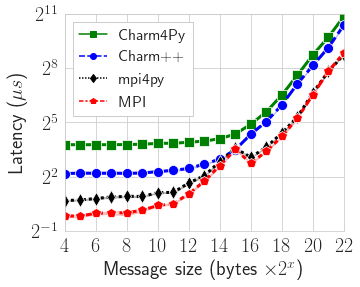

In [26]:
# Plot latency with the MPI backend, intra-socket
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" One-way Time (us)", data=intra_lat,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_yscale('log', base=2)
ax.set_ylim(0.5, 1<<11)
# ax.set_yticklabels([0,5,10,15,20])
ax.set_ylabel('Latency ($\\mu s$)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
# plt.savefig('all_bw_intrasocket_chmpi.pdf', bbox_inches='tight', dpi=300)

2189.877539


Text(0.5, 0, 'Message size (bytes $\\times 2^x$)')

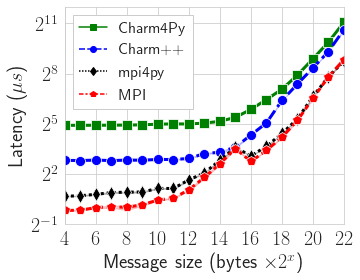

In [29]:
# Plot latency with the MPI backend, intra-socket
print(max(inter_lat[" One-way Time (us)"]))
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" One-way Time (us)", data=inter_lat,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_yscale('log', base=2)
ax.set_ylim(0.5, 1<<12)
# ax.set_yticklabels([0,5,10,15,20])
ax.set_ylabel('Latency ($\\mu s$)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
# plt.savefig('all_bw_intrasocket_chmpi.pdf', bbox_inches='tight', dpi=300)

1671.879432


Text(0.5, 0, 'Message size (bytes $\\times 2^x$)')

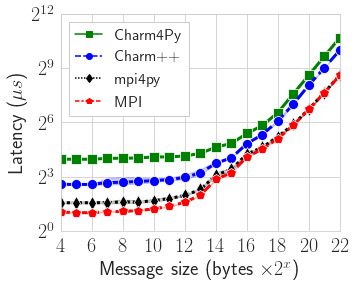

In [32]:
# Plot latency with the MPI backend, intra-socket
print(max(internode_lat[" One-way Time (us)"]))
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" One-way Time (us)", data=internode_lat,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_yscale('log', base=2)
ax.set_ylim(1, 1<<12)
# ax.set_yticklabels([0,5,10,15,20])
ax.set_ylabel('Latency ($\\mu s$)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
# plt.savefig('all_bw_intrasocket_chmpi.pdf', bbox_inches='tight', dpi=300)

- The latency reduction in intra-node figures is caused by the settings for rendezvous threshold in MPI. Setting this threshold (I_MPI_EAGER_THRESHOLD to 8192) yields best performance. intranode experiments were first done with the default settings (above), and were redone with fixed settings. The figures below are used in the paper.

In [30]:
# Latency data, used with tuned rendezvous threshold, provides best performance; used in the paper.
# Data with MPI backend
basedir = '../data/microbenchmarks/2021-08-28_latency_cleaned'
basedir_internode = '../data/microbenchmarks/2021-08-27_latency_cleaned'
read_file = lambda x: pd.read_csv(f"{basedir}/{x}", comment='#')[['Msg Size', ' One-way Time (us)']]
read_file_internode = lambda x: pd.read_csv(f"{basedir_internode}/{x}", comment='#')[['Msg Size', ' One-way Time (us)']]
rf = read_file
rf2 = read_file_internode
chpy_mpi = [rf('charm4py_intrasocket_lat.csv'), rf('charm4py_intersocket_lat.csv'),
           rf2('charm4py_internode_lat.csv')]
ch_mpi = [rf('charm_intrasocket_lat.csv'), rf('charm_intersocket_lat.csv'),
         rf2('charm_internode_lat.csv')]

mppy = [rf('mpi4py_intrasocket_lat.csv'), rf('mpi4py_intersocket_lat.csv'),
       rf2('mpi4py_internode_lat.csv')]
mp = [rf('mpi_intrasocket_lat.csv'), rf('mpi_intersocket_lat.csv'),
     rf2('mpi_internode_lat.csv')]

dfs = [*chpy_mpi, *ch_mpi, *mppy, *mp]

# Will have 2 values because MPI starts at 0 bytes, not 1.
assert(len(set([len(x) for x in dfs])) == 2)

# Build one dataframe for inter and intra containing data for every framework
chpy_mpi[0]['framework'] = 'Charm4Py'
ch_mpi[0]['framework'] = 'Charm++'
mppy[0]['framework'] = 'mpi4py'
mp[0]['framework'] = 'MPI'

chpy_mpi[1]['framework'] = 'Charm4Py'
ch_mpi[1]['framework'] = 'Charm++'
mppy[1]['framework'] = 'mpi4py'
mp[1]['framework'] = 'MPI'

chpy_mpi[2]['framework'] = 'Charm4Py'
ch_mpi[2]['framework'] = 'Charm++'
mppy[2]['framework'] = 'mpi4py'
mp[2]['framework'] = 'MPI'

intra_lat = pd.concat([chpy_mpi[0], ch_mpi[0], mppy[0], mp[0]]).reset_index(drop=True)
intra_lat = intra_lat[intra_lat['Msg Size'] >= 1<<4]
intra_lat['Msg Size'] = np.log2(intra_lat['Msg Size'])

inter_lat = pd.concat([chpy_mpi[1], ch_mpi[1], mppy[1], mp[1]]).reset_index(drop=True)
inter_lat = inter_lat[inter_lat['Msg Size'] >= 1<<4]
inter_lat['Msg Size'] = np.log2(inter_lat['Msg Size'])


internode_lat = pd.concat([chpy_mpi[2], ch_mpi[2], mppy[2], mp[2]]).reset_index(drop=True)
internode_lat = internode_lat[internode_lat['Msg Size'] >= 1<<4]
internode_lat['Msg Size'] = np.log2(internode_lat['Msg Size'])

1888.096248


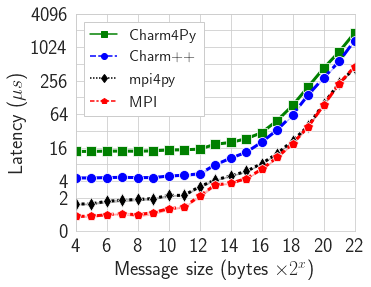

In [32]:
# Plot latency with the MPI backend, intra-socket
print(max(intra_lat[" One-way Time (us)"]))
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" One-way Time (us)", data=intra_lat,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_yscale('symlog', base=2,linthresh=2)
ax.set_ylim(0, 1<<12)
ax.grid(True, which='major')
ax.grid(True, which='minor')
ax.set_yticks([0, 1<<1, 1<<2, 1<<4, 1<<6, 1<<8, 1<<10, 1<<12])
ax.set_yticklabels([0, 2, 4, 16, 64, 256, 1024, 4096])
ax.set_xticklabels([4,6,8,10,12,14,16,18,20,22])
ax.set_ylabel('Latency ($\\mu s$)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_lat_intrasocket_chmpi.pdf', bbox_inches='tight', dpi=300)

2192.337172


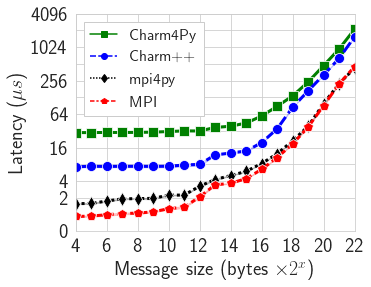

In [33]:
# Plot latency with the MPI backend, intra-socket
print(max(inter_lat[" One-way Time (us)"]))
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" One-way Time (us)", data=inter_lat,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_yscale('symlog', base=2,linthresh=2)
ax.set_ylim(0, 1<<12)
ax.grid(True, which='major')
ax.grid(True, which='minor')
ax.set_yticks([0, 1<<1, 1<<2, 1<<4, 1<<6, 1<<8, 1<<10, 1<<12])
ax.set_yticklabels([0, 2, 4, 16, 64, 256, 1024, 4096])
ax.set_xticklabels([4,6,8,10,12,14,16,18,20,22])

ax.set_ylabel('Latency ($\\mu s$)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_lat_intersocket_chmpi.pdf', bbox_inches='tight', dpi=300)

1671.879432


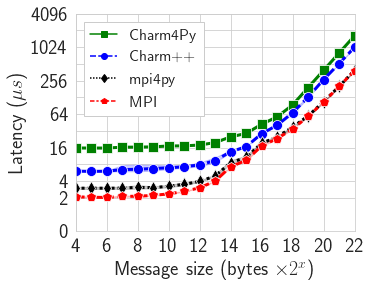

In [34]:
# Plot latency with the MPI backend, intra-socket
print(max(internode_lat[" One-way Time (us)"]))
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" One-way Time (us)", data=internode_lat,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 16, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_yscale('symlog', base=2,linthresh=2)
ax.set_ylim(0, 1<<12)
ax.grid(True, which='major')
ax.grid(True, which='minor')
ax.set_yticks([0, 1<<1, 1<<2, 1<<4, 1<<6, 1<<8, 1<<10, 1<<12])
ax.set_yticklabels([0, 2, 4, 16, 64, 256, 1024, 4096])
ax.set_xticklabels([4,6,8,10,12,14,16,18,20,22])
ax.set_ylabel('Latency ($\\mu s$)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_lat_internode_chmpi.pdf', bbox_inches='tight', dpi=300)

# GPU Benchmarks
## Bandwidth

In [57]:
# Latency data, used with tuned rendezvous threshold, provides best performance; used in the paper.
# Data with MPI backend
basedir = '../data/microbenchmarks/2021-08-31_bandwidth_gpu_cleaned'
basedir_internode = '../data/microbenchmarks/2021-08-27_latency_cleaned'
read_file = lambda x: pd.read_csv(f"{basedir}/{x}", comment='#')[['Msg Size', ' Bandwidth (MB/s)']]
read_file_internode = lambda x: pd.read_csv(f"{basedir_internode}/{x}", comment='#')[['Msg Size', ' Bandwidth (MB/s)']]
rf = read_file
rf2 = read_file_internode
chpy_mpi = [rf('charm4py_intranode_gpu_bw.csv')]
#            rf2('charm4py_internode_lat.csv')]
ch_mpi = [rf('charm_intranode_gpu_bw.csv')]
#          rf2('charm_internode_lat.csv')]

mppy = [rf('mpi4py_intranode_gpu_bw.csv')]
#        rf2('mpi4py_internode_lat.csv')]
mp = [rf('mpi_intranode_gpu_bw.csv')]
#      rf2('mpi_internode_lat.csv')]

dfs = [*chpy_mpi, *ch_mpi, *mppy, *mp]

assert(len(set([len(x) for x in dfs])) == 1)

# Build one dataframe for inter and intra containing data for every framework
chpy_mpi[0]['framework'] = 'Charm4Py'
ch_mpi[0]['framework'] = 'Charm++'
mppy[0]['framework'] = 'mpi4py'
mp[0]['framework'] = 'MPI'

# chpy_mpi[1]['framework'] = 'Charm4Py'
# ch_mpi[1]['framework'] = 'Charm++'
# mppy[1]['framework'] = 'mpi4py'
# mp[1]['framework'] = 'MPI'

# chpy_mpi[2]['framework'] = 'Charm4Py'
# ch_mpi[2]['framework'] = 'Charm++'
# mppy[2]['framework'] = 'mpi4py'
# mp[2]['framework'] = 'MPI'

intra_bw = pd.concat([chpy_mpi[0], ch_mpi[0], mppy[0], mp[0]]).reset_index(drop=True)
intra_bw = intra_bw[intra_bw['Msg Size'] >= 1<<4]
intra_bw['Msg Size'] = np.log2(intra_bw['Msg Size'])

# inter_lat = pd.concat([chpy_mpi[1], ch_mpi[1], mppy[1], mp[1]]).reset_index(drop=True)
# inter_lat = inter_lat[inter_lat['Msg Size'] >= 1<<4]
# inter_lat['Msg Size'] = np.log2(inter_lat['Msg Size'])


# internode_lat = pd.concat([chpy_mpi[2], ch_mpi[2], mppy[2], mp[2]]).reset_index(drop=True)
# internode_lat = internode_lat[internode_lat['Msg Size'] >= 1<<4]
# internode_lat['Msg Size'] = np.log2(internode_lat['Msg Size'])

/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


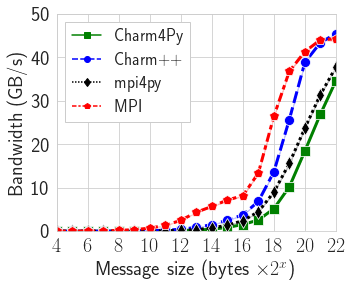

In [70]:
# Plot bandwidth with the MPI backend, inter-node
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" Bandwidth (MB/s)", data=intra_bw,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 17, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_ylim(0, 50000)
ax.set_yticklabels([0, 10, 20, 30, 40, 50])
ax.set_ylabel('Bandwidth (GB/s)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_bw_intranode_gpu.pdf', bbox_inches='tight', dpi=300)

## Latency

In [37]:
# Latency data, used with tuned rendezvous threshold, provides best performance; used in the paper.
# Data with MPI backend
basedir = '../data/microbenchmarks/2021-08-31_latency_gpu_cleaned'
basedir_internode = '../data/microbenchmarks/2021-08-27_latency_cleaned'
read_file = lambda x: pd.read_csv(f"{basedir}/{x}", comment='#')[['Msg Size', ' One-way Time (us)']]
read_file_internode = lambda x: pd.read_csv(f"{basedir_internode}/{x}", comment='#')[['Msg Size', ' One-way Time (us)']]
rf = read_file
rf2 = read_file_internode
chpy_mpi = [rf('charm4py_intranode_gpu_lat.csv')]
#            rf2('charm4py_internode_lat.csv')]
ch_mpi = [rf('charm_intranode_gpu_lat.csv')]
#          rf2('charm_internode_lat.csv')]

mppy = [rf('mpi4py_intranode_gpu_lat.csv')]
#        rf2('mpi4py_internode_lat.csv')]
mp = [rf('mpi_intranode_gpu_lat.csv')]
#      rf2('mpi_internode_lat.csv')]

dfs = [*chpy_mpi, *ch_mpi, *mppy, *mp]

# Will have 2 values because MPI starts at 0 bytes, not 1.
assert(len(set([len(x) for x in dfs])) == 2)

# Build one dataframe for inter and intra containing data for every framework
chpy_mpi[0]['framework'] = 'Charm4Py'
ch_mpi[0]['framework'] = 'Charm++'
mppy[0]['framework'] = 'mpi4py'
mp[0]['framework'] = 'MPI'

# chpy_mpi[1]['framework'] = 'Charm4Py'
# ch_mpi[1]['framework'] = 'Charm++'
# mppy[1]['framework'] = 'mpi4py'
# mp[1]['framework'] = 'MPI'

# chpy_mpi[2]['framework'] = 'Charm4Py'
# ch_mpi[2]['framework'] = 'Charm++'
# mppy[2]['framework'] = 'mpi4py'
# mp[2]['framework'] = 'MPI'

intra_lat = pd.concat([chpy_mpi[0], ch_mpi[0], mppy[0], mp[0]]).reset_index(drop=True)
intra_lat = intra_lat[intra_lat['Msg Size'] >= 1<<4]
intra_lat['Msg Size'] = np.log2(intra_lat['Msg Size'])

# inter_lat = pd.concat([chpy_mpi[1], ch_mpi[1], mppy[1], mp[1]]).reset_index(drop=True)
# inter_lat = inter_lat[inter_lat['Msg Size'] >= 1<<4]
# inter_lat['Msg Size'] = np.log2(inter_lat['Msg Size'])


# internode_lat = pd.concat([chpy_mpi[2], ch_mpi[2], mppy[2], mp[2]]).reset_index(drop=True)
# internode_lat = internode_lat[internode_lat['Msg Size'] >= 1<<4]
# internode_lat['Msg Size'] = np.log2(internode_lat['Msg Size'])

156.294584274292


/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


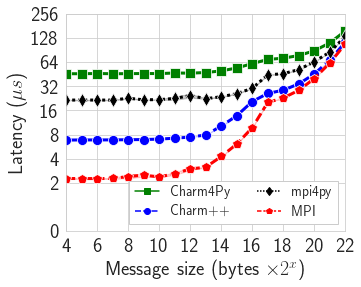

In [68]:
# Plot latency with the MPI backend, intra-socket
print(max(intra_lat[" One-way Time (us)"]))
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Msg Size", y=" One-way Time (us)", data=intra_lat,hue="framework", style="framework",
              palette = ['green','blue', 'black', 'red'],ax=ax,ci=99, markers=['s','o', 'd', 'p'],
              linewidth=3, markersize=10)
ax.legend(fontsize = 14, loc = 'lower right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 2)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_xlim(4, 22)
ax.set_xticks(range(4,23,2))
ax.set_yscale('symlog', base=2,linthresh=2)
ax.set_ylim(0, 1<<8)
ax.grid(True, which='major')
ax.grid(True, which='minor')
# ax.set_yticks([0, 1<<1, 1<<3, 1<<5, 7<<9, 1<<11, 1<<13, 1<<15])
ax.set_yticklabels([0, 2, 4, 8, 16, 32, 64, 128, 256])
ax.set_xticklabels([4,6,8,10,12,14,16,18,20,22])
ax.set_ylabel('Latency ($\\mu s$)', fontsize=20)
ax.set_xlabel('Message size (bytes $\\times 2^x$)', fontsize=20)
plt.savefig('all_lat_intranode_gpu.pdf', bbox_inches='tight', dpi=300)